<a href="https://colab.research.google.com/github/nandukamankar/Unsupervised-Learning-project/blob/main/Unsupervised_ML_Online_Retail_Customer_Segmentation_Nandu_Kamankar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title :- Online Retail Customer Segmentation. </u></b>

# Project Type :- Capstone Project - Unsupervised Machine Learning

### **Contribution :- Team**

### Team Member 1 :- Deepak Singh

### Team Member 2 :- Nandu Kamankar

# **PROJECT SUMMARY :-**

* ### In this project, the main objective is to analyze a transnational data set from a UK-based and registered non-store online retail company. The data set encompasses all the transactions that took place between 01/12/2010 and 09/12/2011. The company specializes in selling unique all-occasion gifts, and a significant portion of their customer base consists of wholesalers.

* ### The focus of the project is to identify major customer segments within this dataset. Customer segmentation involves grouping customers based on similarities in their purchasing behavior, demographics, or other relevant characteristics. By understanding the different segments, the company can tailor its marketing strategies, product offerings, and customer service to better meet the specific needs and preferences of each segment.

* ### To achieve this, the project will involve applying various analytical techniques and machine learning algorithms to uncover underlying patterns and trends in the data. Additionally, statistical analysis and data visualization will be utilized to gain insights and communicate the findings effectively.

* ### Ultimately, the project aims to provide the company with actionable insights into its customer base, enabling targeted marketing campaigns, improved customer satisfaction, and increased profitability. By identifying major customer segments and tailoring strategies accordingly, the company can enhance its competitive advantage in the online retail industry while maximizing customer engagement and loyalty.

# **GitHub Link :-**https://github.com/nandukamankar/Unsupervised-Learning-project

# **Problem Statement:-**

### The UK-based non-store online retail company, specializing in unique all-occasion gifts, has a vast customer base that includes wholesalers. To enhance its marketing strategies and improve customer engagement, the company seeks to identify major customer segments within a transnational data set comprising all the transactions that occurred between 01/12/2010 and 09/12/2011.

### The absence of customer segmentation prevents the company from effectively targeting its marketing efforts and providing personalized experiences. By understanding the distinct characteristics, purchasing behaviors, and preferences of different customer segments, the company can tailor its strategies to better meet the specific needs of each segment.

### The lack of targeted marketing campaigns limits the company's ability to maximize profitability and customer satisfaction. Without segment-specific approaches, the company may struggle to effectively allocate resources, develop relevant product offerings, and establish personalized communication channels.

# **Data Description:-**

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

##**Business Problem**

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [ ]:
# Importing required libraries:-
import numpy as np

# To handle the dataset:-
import pandas as pd
from datetime import datetime

# For plots and visualizations:-
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering;-
from scipy.cluster.hierarchy import dendrogram,linkage

# To scale the data:-
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# metrics to evaluate the clusters:-
from sklearn.metrics import silhouette_score, silhouette_samples

# Clustering alorithms:-
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Display utilities:-
from IPython.display import Markdown, display

# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the drive:-

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset:-

df = pd.read_csv('/content/drive/MyDrive/almabetter/project_work/UNSUPERVISED LEARNING PROJECT/Online Retail.xlsx - Online Retail.csv')

# **DATA EXPLORATION**

In [ ]:
# Looking at the first 5 Rows of the Dataset.

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Looking at the last 5 Rows of the Dataset.

df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
# Checking the shape of the dataset.

df.shape

(541909, 8)

We have total 541909 Rows and 08 columns in tha dataset.

In [ ]:
# Checking all the columns present in the dataset:-

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Checking the information about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


There are total 541909 rows/observations and 08 columns in this dataset. It has int64, float64 & object as data types.

In [ ]:
# Checking the sum of null values present in the dataset:-

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

From this we can see that two cloumns contains missing values,
column "Description" contains 1454 missing value whereas "Customer ID" contains 135000 missing values.

In [ ]:
# Checking the descriptive Statistics of the data:-

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Checking numbers of unique values in each columns:-

for i in df.columns:
  print(i,':' ,df[i].nunique())

InvoiceNo : 25900
StockCode : 4070
Description : 4223
Quantity : 722
InvoiceDate : 23260
UnitPrice : 1630
CustomerID : 4372
Country : 38


# **Data Cleaning and Feature Engineering:-**

In [ ]:
# Analyzing the missing data counts and percentage:-

missing = df.columns[df.isnull().any()].tolist()
missing

print('Missing Data count')
print(df[missing].isnull().sum().sort_values(ascending=False))

print('--'*12)   # To make a separation line.

print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_values(ascending=False)/len(df)*100,2))

Missing Data count
CustomerID     135080
Description      1454
dtype: int64
------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


*  **24.93% of items purchases are not assigned to any customer.**
* **Hence there is no use of having the data with no customer assignment.**
* **Because we can't form clusters without CustomerID so we will delete them from dataset.**

In [ ]:
# Dropping the rows with null values:-

df.dropna(subset=['CustomerID'],inplace=True)

In [ ]:
# Checking for the duplicates:-

print(len(df[df.duplicated()]))

5225


In [ ]:
# Dropping the duplicate rows:-

df.drop_duplicates(inplace=True)

In [ ]:
# checking null counts and datatype in each columns:-

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


After reviewing the data, it is evident that there are no Null Values present. Additionally, the invoice date column is currently in object type and needs to be converted to datetime

In [ ]:
# Converting the object type into date time:-

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Checking if the changes have occured:-

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
# Deriving the year, month, day, and hour components from the InvoiceDate column:-

df["year"]  = df["InvoiceDate"].apply(lambda x: x.year)
df['Month'] = df['InvoiceDate'].apply(lambda x: x.month_name())
df['Day']   = df['InvoiceDate'].apply(lambda x: x.day_name())
df["hour"]  = df["InvoiceDate"].apply(lambda x: x.hour)

In [ ]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice:-

df['TotalAmount']= df['UnitPrice'] * df['Quantity']

In [ ]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening:-

df['TimeType'] = np.where((df["hour"]>5)&(df["hour"]<18), np.where(
                           df["hour"]<12, 'Morning','Afternoon'),'Evening')

In [ ]:
# Checking whether InvoiceNo contains any cancellation "C":-
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
cancellations = df[df['InvoiceNo'].str.contains('C')]

# Checking the shape:-
cancellations.shape

(8872, 14)

In [ ]:
# Dropping cancellations from the main dataframe:-

df = df[~df['InvoiceNo'].str.contains('C')]

# **Exploratory Data Analysis (EDA):-**

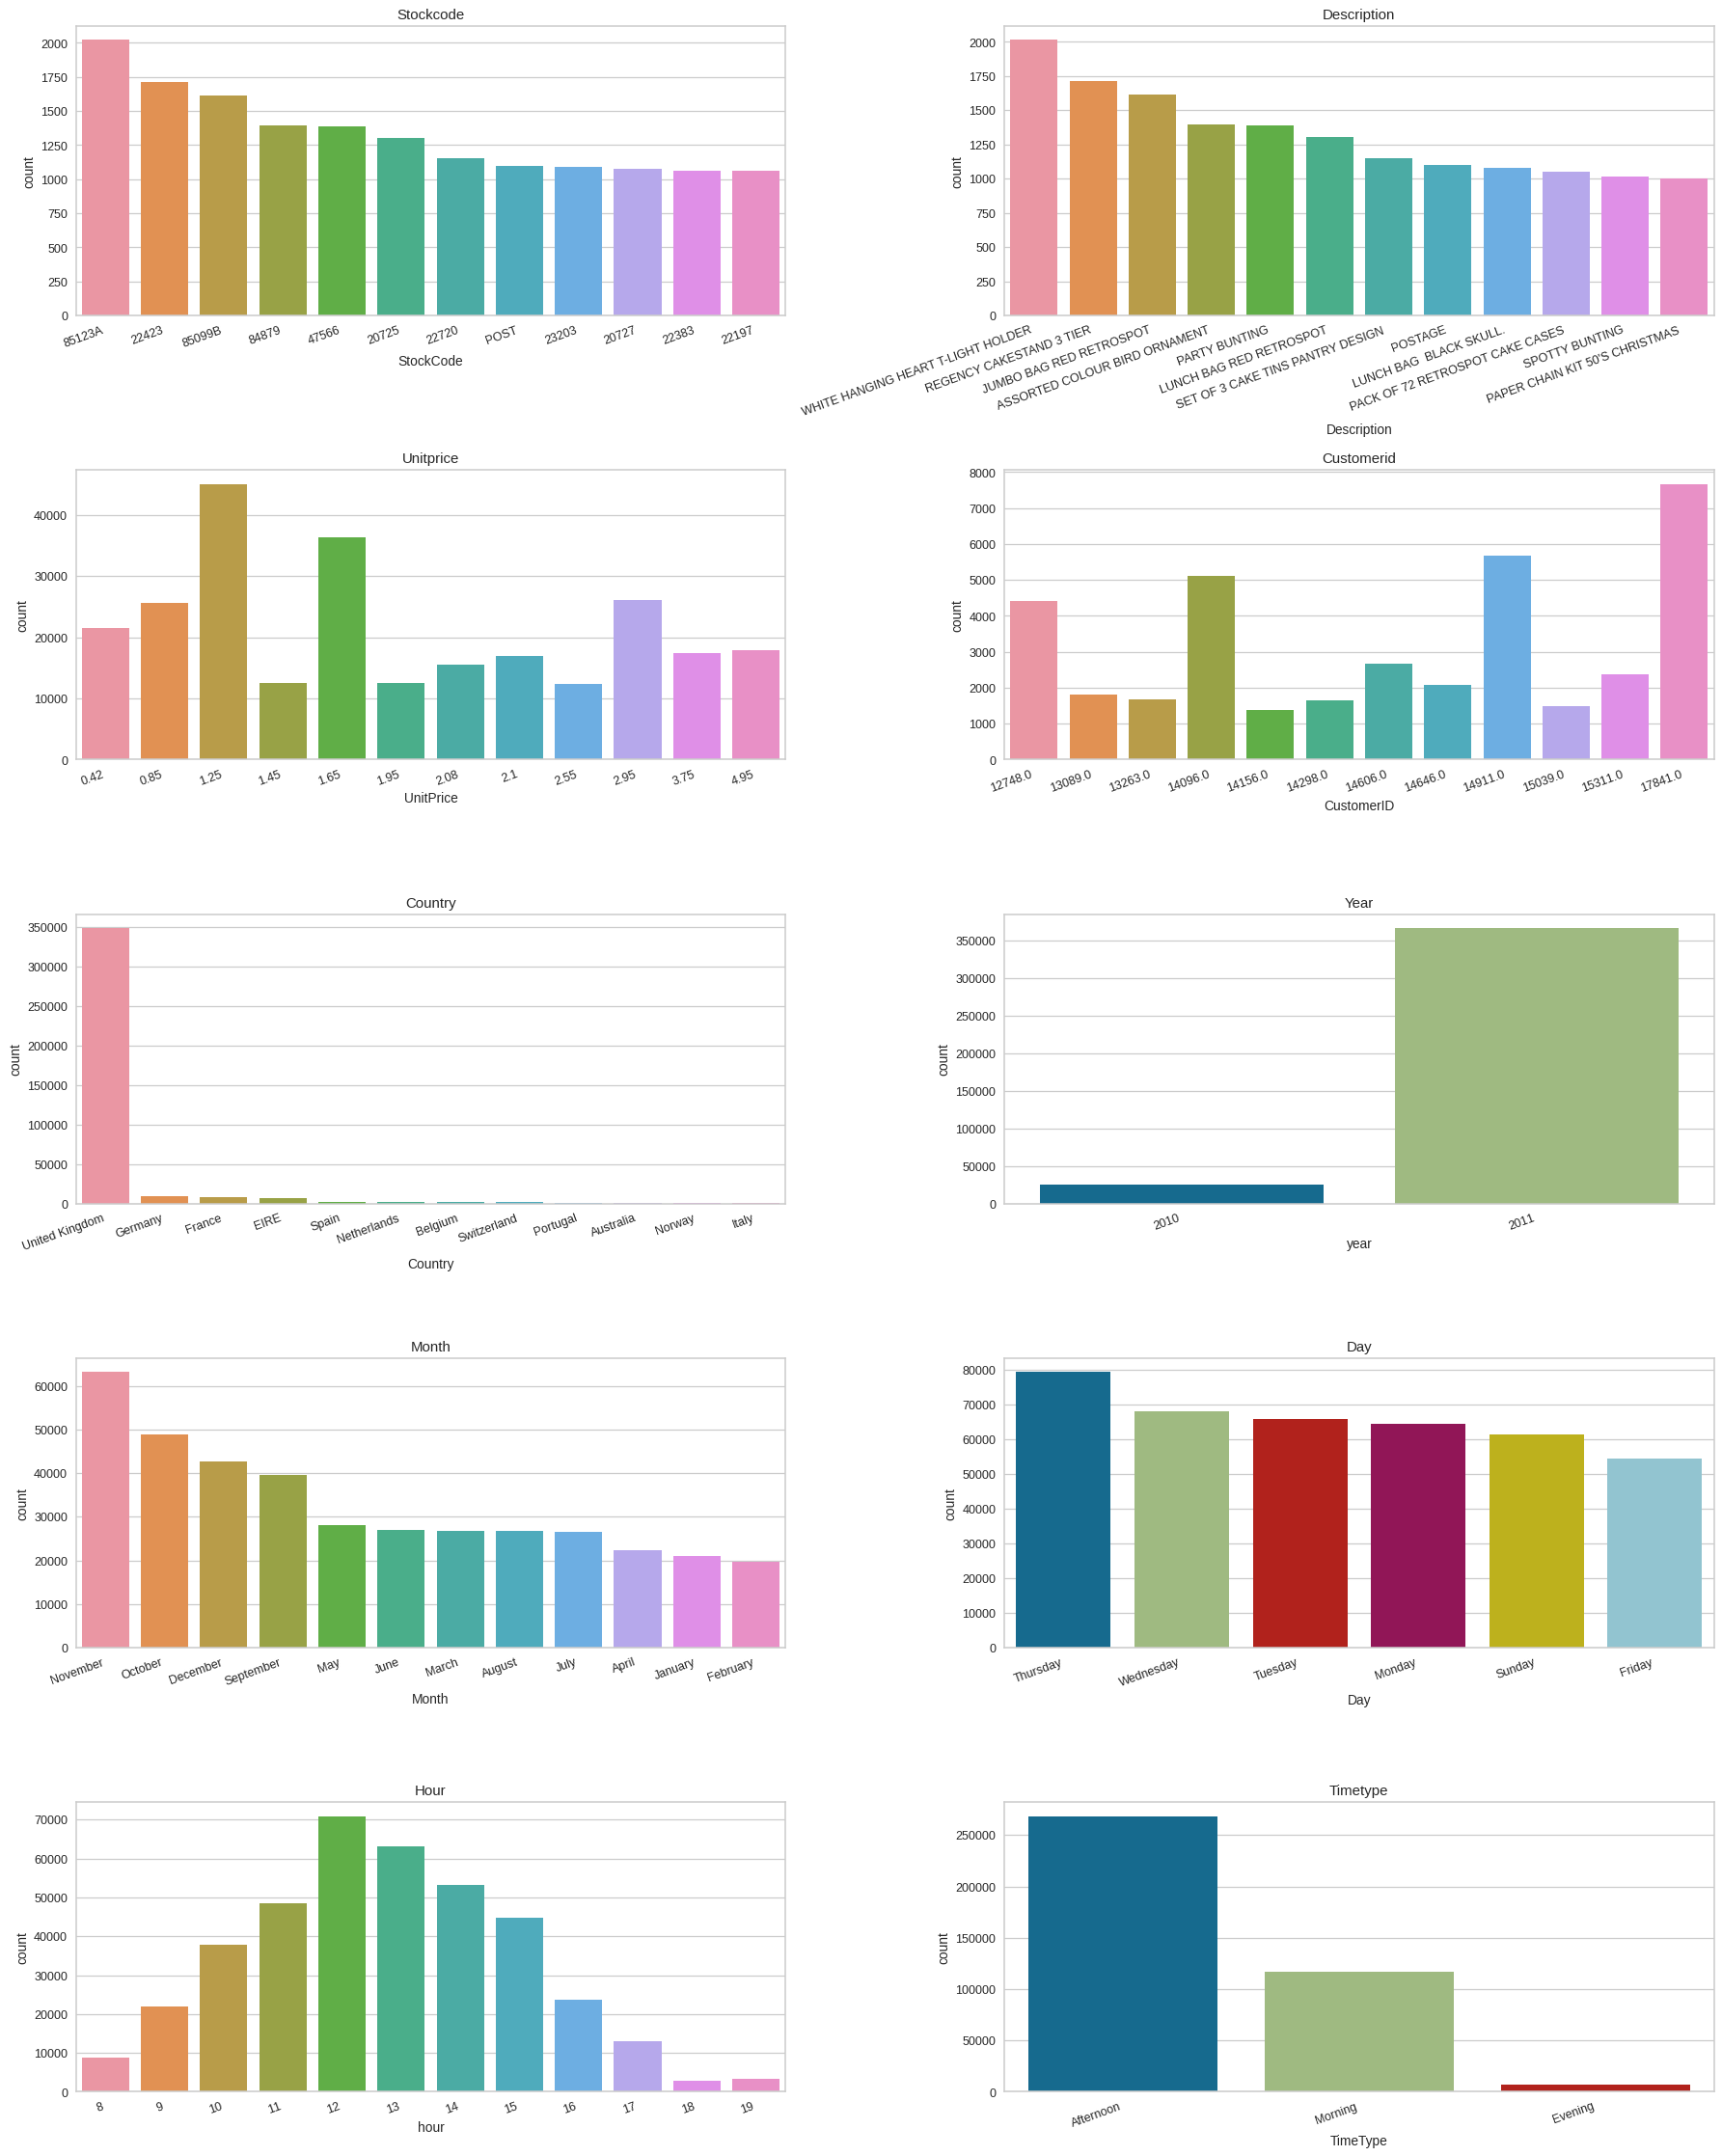

In [ ]:
# Plotting top values based on frequency in each column:-

target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'Month','Day','hour','TimeType']

plt.figure(figsize=(20,25), dpi=90)
for n,col in enumerate(target):
  plt.subplot(5, 2, n+1)
  temp = df[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

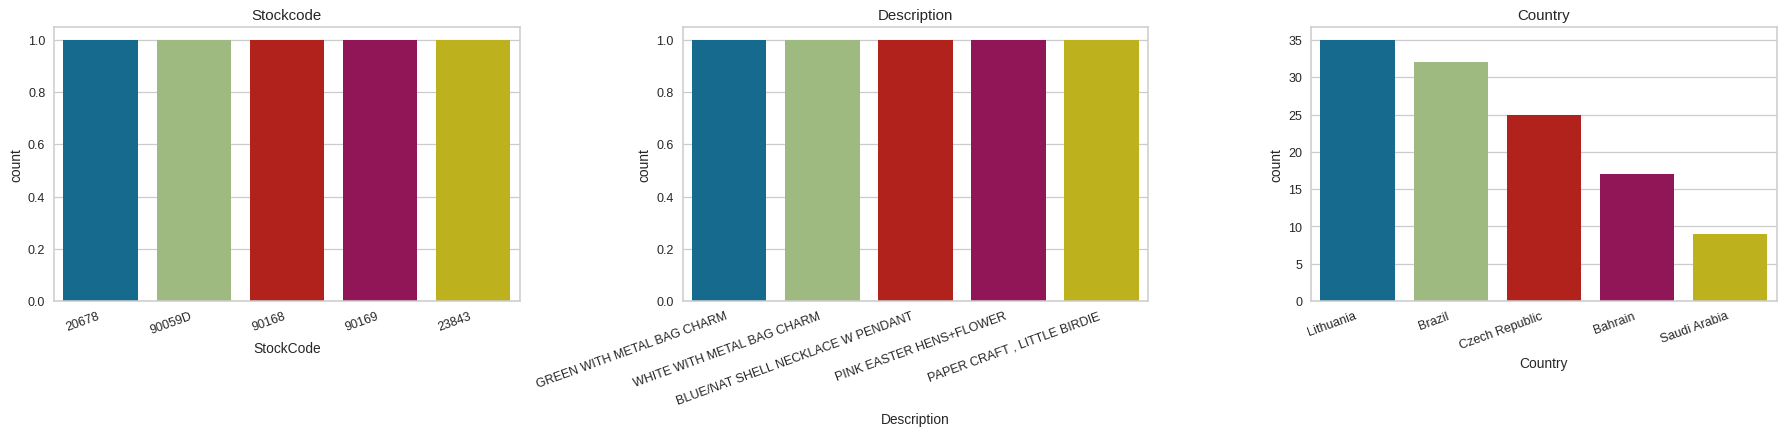

In [ ]:
# Plotting Bottom values based on frequency in each column:-

target = ['StockCode', 'Description','Country']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  temp = df[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

# **Hypothesis From the Data Visualized:**
* Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has least number of customers.
* There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
* Most of the customers have purchased the gifts in the month of November, October, December and September. Less number of customers have purchased the gifts in the month of April, January and February.
* Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and the least in Evening.
* WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products.

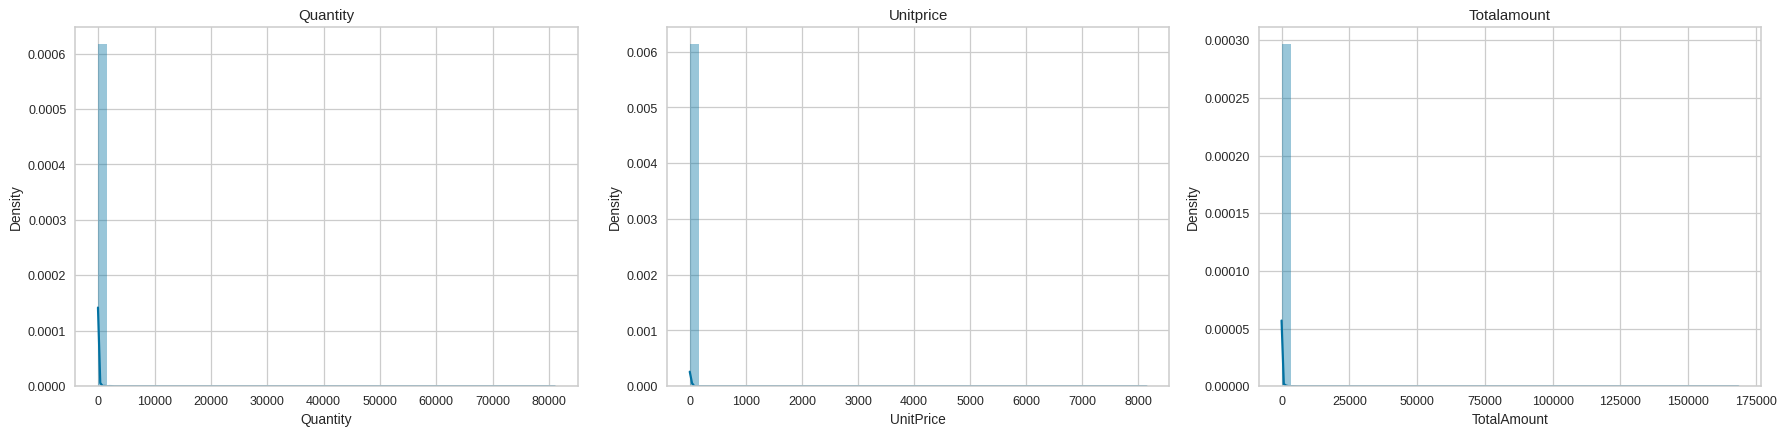

In [ ]:
# Visualizing the distributions:-

target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(df[col])
  plt.title(col.title())
  plt.tight_layout()

# **Observation:**
* It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode.
* For symmetric graph mean=median=mode.

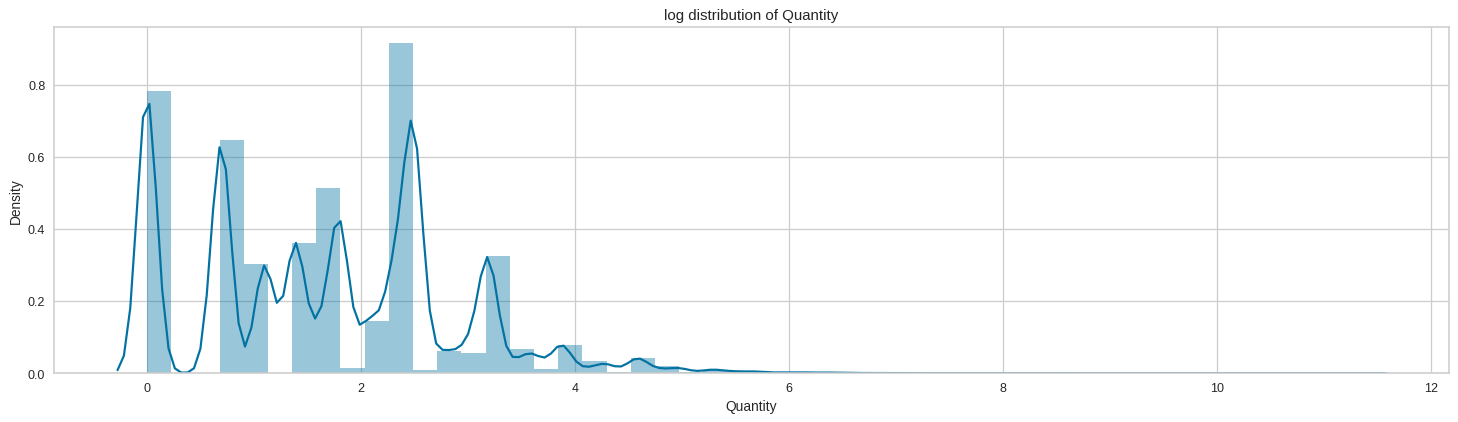

In [ ]:
# Visualizing the distributions after log transformation of Quantity:-

plt.figure(figsize=(20,5), dpi=90)
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))
plt.show()

In [ ]:
# Most orders placed are from these countries:-

country_invoice = df.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
country_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
country_invoice.head(10)

,Country,Invoice_Count
35,United Kingdom,16649
14,Germany,457
13,France,389
10,EIRE,260
3,Belgium,98
23,Netherlands,95
30,Spain,90
0,Australia,57
26,Portugal,57
32,Switzerland,51


* The United Kingdom stands out as the top country in terms of purchase activity when compared to other countries.

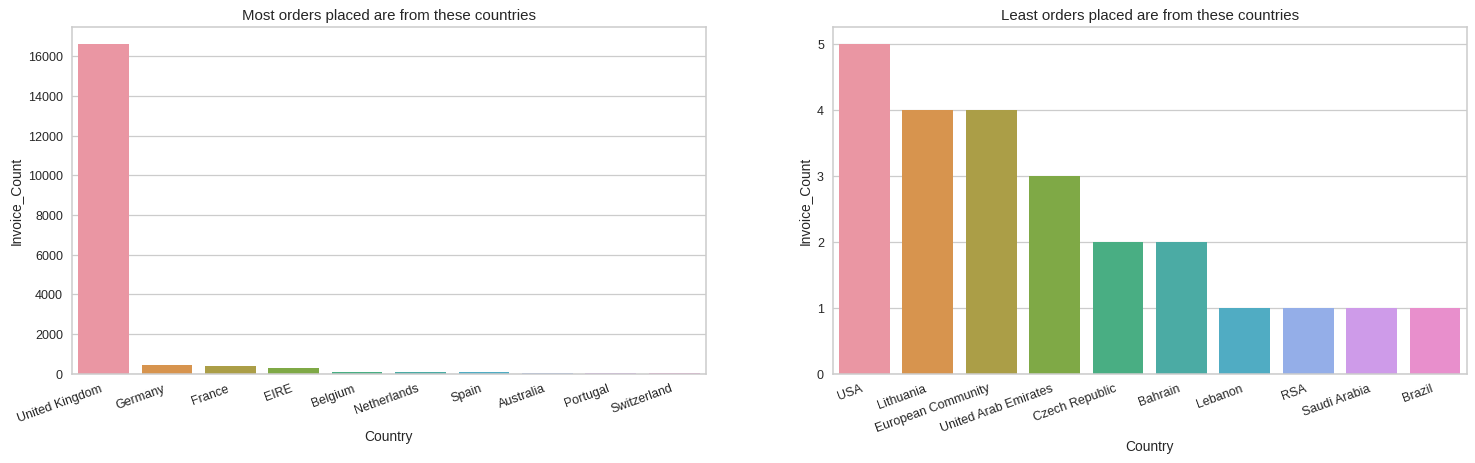

In [ ]:
# Visualizing top and bottom 10 countries based on total invoices:-

plt.figure(figsize=(20,5),dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most orders placed are from these countries")
sns.barplot(data=country_invoice.head(10),x="Country",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least orders placed are from these countries")
sns.barplot(data=country_invoice.tail(10),x="Country",y="Invoice_Count")
plt.show()

In [ ]:
# Most customers are from these countries:-

country_cust = df.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

,Country,Customer_Count
35,United Kingdom,3921
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25


* The United Kingdom leads in terms of customer count.

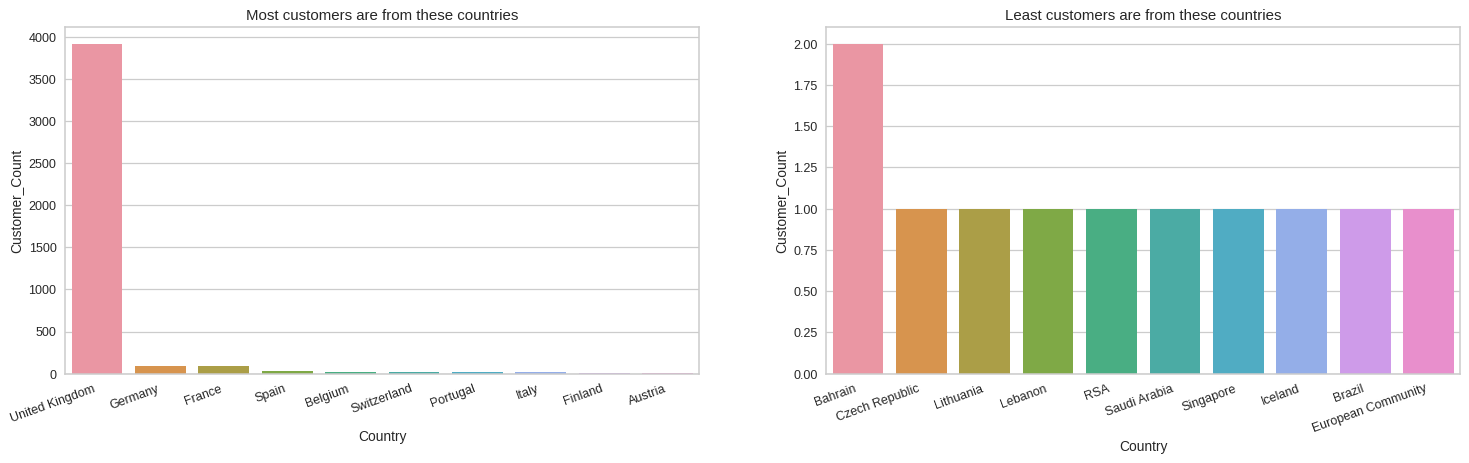

In [ ]:
# Visualizing top and bottom 10 countries based on total customers:-

plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=country_cust.head(10),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=country_cust.tail(10),x="Country",y="Customer_Count")
plt.show()

In [ ]:
# Countrywise average item purchases:-

country_quantity = df.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

,Country,Average_Quantity
23,Netherlands,85.034702
19,Japan,81.046729
31,Sweden,80.173333
0,Australia,71.114020
8,Czech Republic,26.840000


*
Customers from the Netherlands place orders with significant quantities.

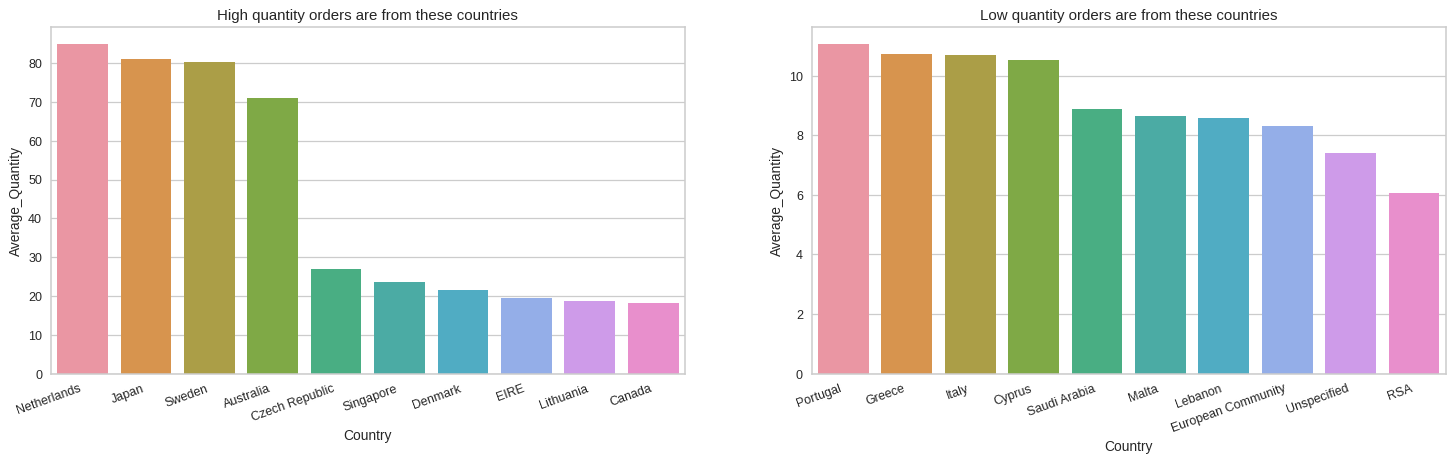

In [ ]:
# Visualizing top and bottom 10 countries based on average item purchases:-

plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quantity.head(10),x="Country",y="Average_Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_quantity.tail(10),x="Country",y="Average_Quantity")
plt.show()

In [ ]:
# Quantity wise item purchases:-

product_quantity = df.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706


* Product - PAPER CRAFT, LITTLE BRIDE has the highest purchased quantity.